# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [705]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [706]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [707]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [708]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [709]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [710]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [711]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [712]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


/var/folders/66/hjdps8cj0sd_nt4v35d18wzc0000gn/T/ipykernel_22598/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [713]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


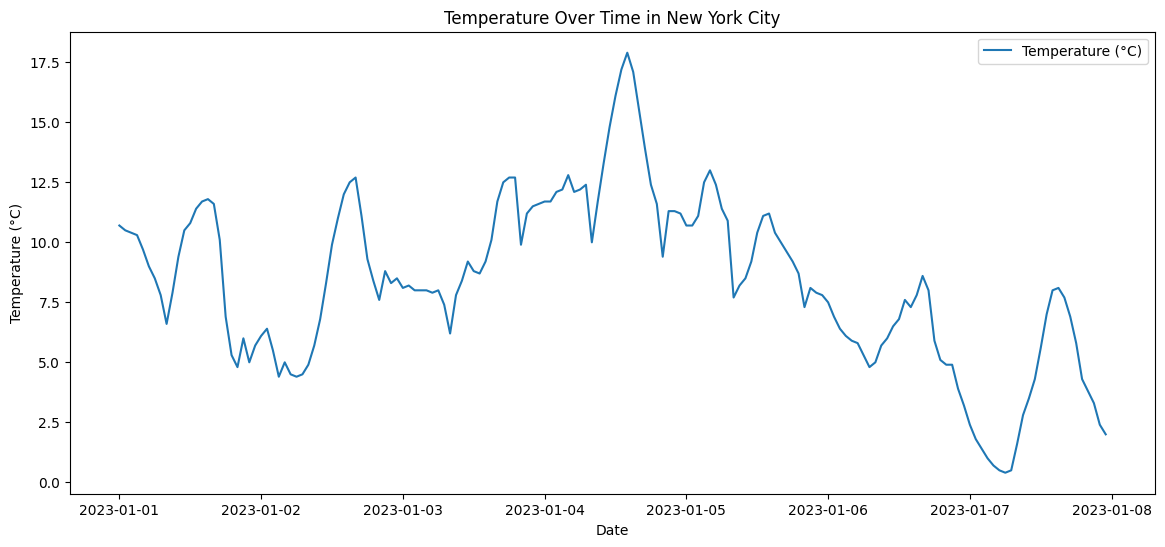

In [714]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

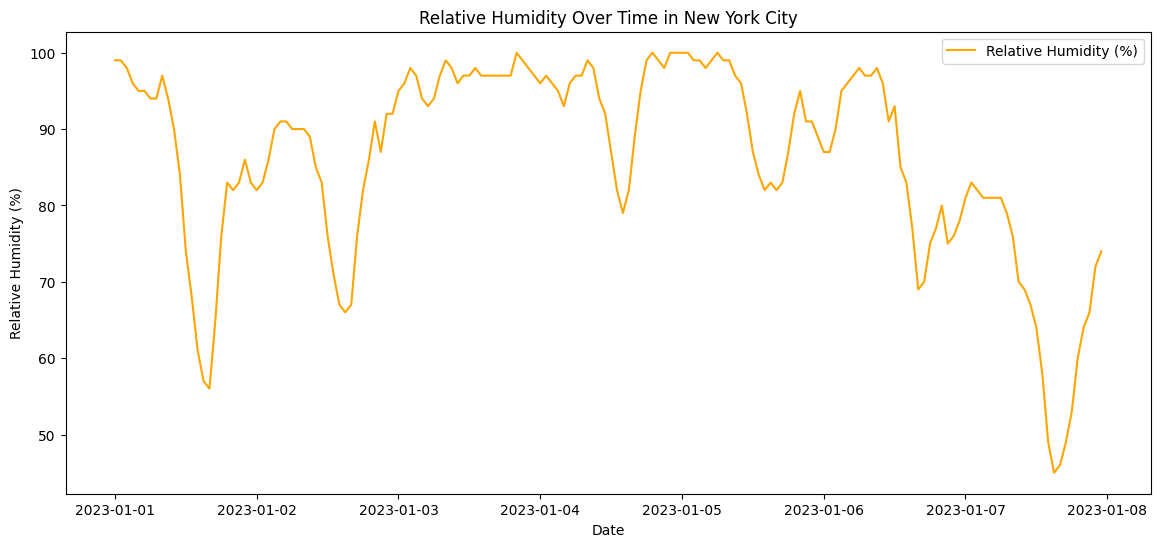

In [715]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


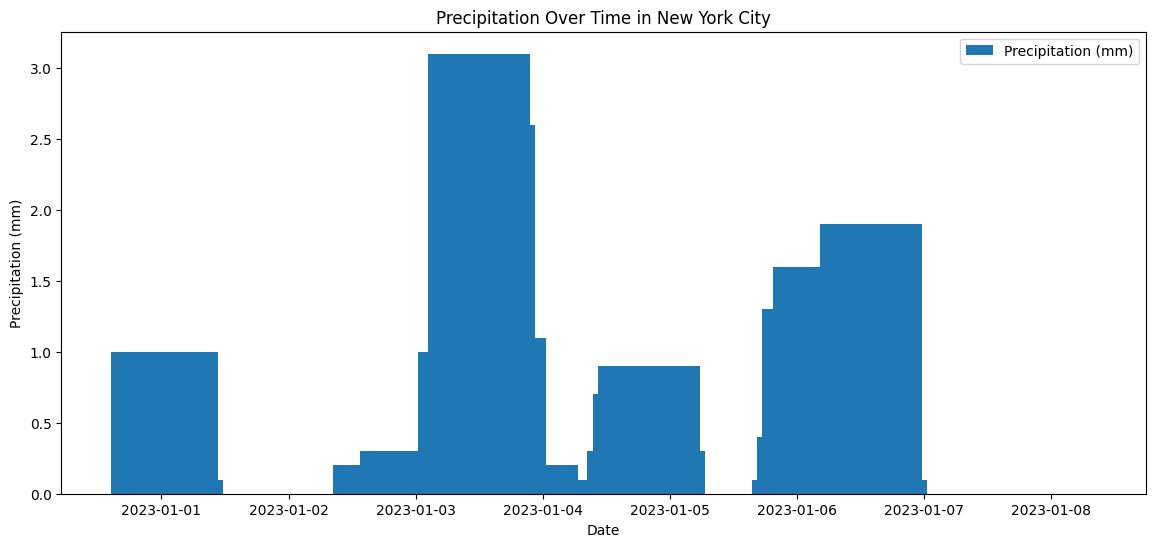

In [716]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [717]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


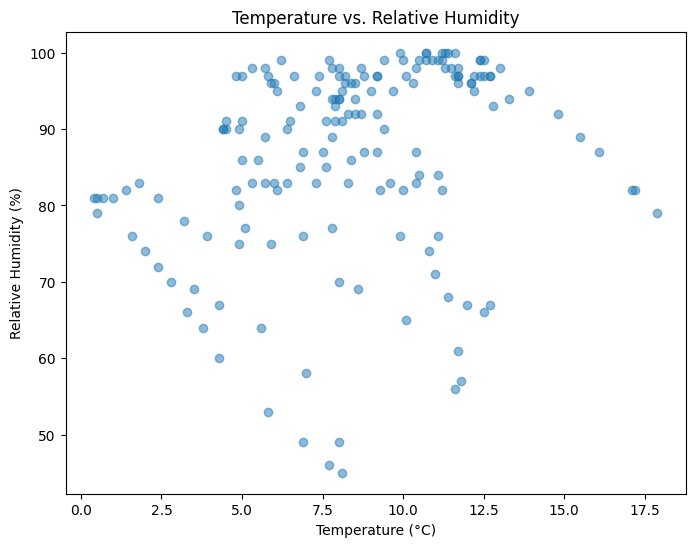

In [718]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [719]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


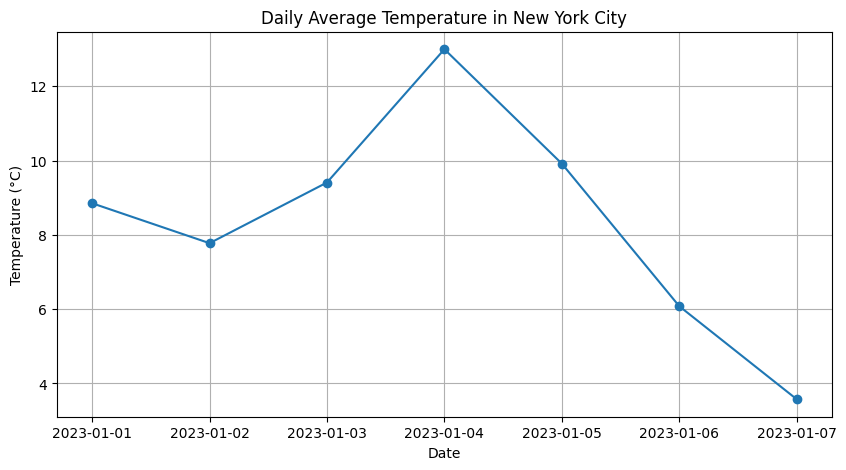

In [720]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [721]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

In [722]:
# Check if the request was successful

if response_la.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_la.status_code}')

Data fetched successfully!


In [723]:
# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)

/var/folders/66/hjdps8cj0sd_nt4v35d18wzc0000gn/T/ipykernel_22598/1751592227.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [724]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [725]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


In [726]:
combined_temp.head()

,New York,Los Angeles
time,,
2023-01-01,8.850000,12.433333
2023-01-02,7.775000,9.483333
2023-01-03,9.408333,11.808333
2023-01-04,12.995833,13.766667
2023-01-05,9.916667,12.183333


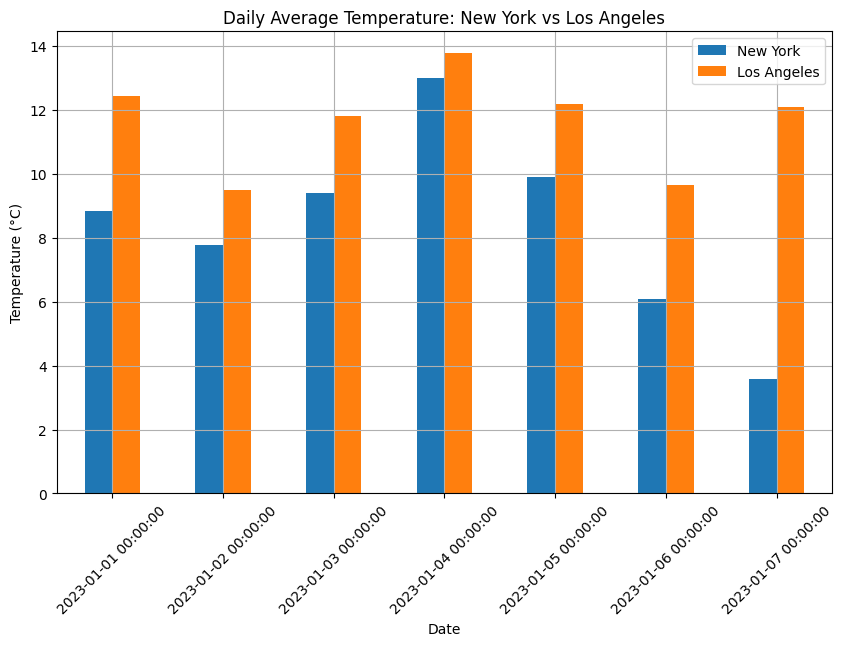

In [727]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [728]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [729]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


london_coord = (51.5074, -0.1278)
seattle_coord = (47.6062, -122.3321)

In [730]:
# Step 1: Set Up Parameters for London

# Location coordinates for London
latitude_london = 51.5074
longitude_london = -0.1278

# Location coordinates for Seattle
latitude_seattle = 47.6062
longitude_seattle = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [731]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_london = {
    'latitude': latitude_london,
    'longitude': longitude_london,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response_london = requests.get(base_url, params=params_london)


In [732]:
# Check if the request was successful

if response_london.status_code == 200:
    print('Data fetched successfully!')
elif response_london.status_code == 429:
    retry_after = int(response.headers.get('Retry-After', 10)) # Default to 10 seconds
    print(f"Rate limit hit. Retry API call after {retry_after} seconds...")
    time.sleep(retry_after)
else:
    print(f'Failed to fetch data. Status code: {response_london.status_code}')

Data fetched successfully!


In [733]:
# Step 3: Load Data into pandas DataFrame

data = response_london.json()
hourly_data = data['hourly']

df_london = pd.DataFrame(hourly_data)
df_london.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,12.7,91,0.0
1,2022-01-01T01:00,12.7,93,0.0
2,2022-01-01T02:00,12.8,93,0.0
3,2022-01-01T03:00,12.5,93,0.0
4,2022-01-01T04:00,12.3,92,0.0


In [734]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df_london['time'] = pd.to_datetime(df_london['time'])

# Set 'time' as the index
df_london.set_index('time', inplace=True)

# Check for missing values
df_london.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [735]:
# Handle missing values (if any)
df_london.fillna(method='ffill', inplace=True)  # Forward fill

/var/folders/66/hjdps8cj0sd_nt4v35d18wzc0000gn/T/ipykernel_22598/154401697.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_london.fillna(method='ffill', inplace=True)  # Forward fill


In [736]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df_london.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,12.013082,76.635388,0.075662
std,6.651766,16.722080,0.404500
min,-5.400000,17.000000,0.000000
25%,7.400000,65.000000,0.000000
50%,11.900000,81.000000,0.000000
75%,16.400000,90.000000,0.000000
max,38.000000,100.000000,14.700000


In [737]:
weekly_avg_london = df_london.resample('W').mean()
weekly_avg_london.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-02,12.077083,86.583333,0.045833
2022-01-09,4.293452,86.000000,0.076786
2022-01-16,3.513095,94.750000,0.018452
2022-01-23,2.611310,89.404762,0.000000
2022-01-30,4.813690,86.535714,0.000595


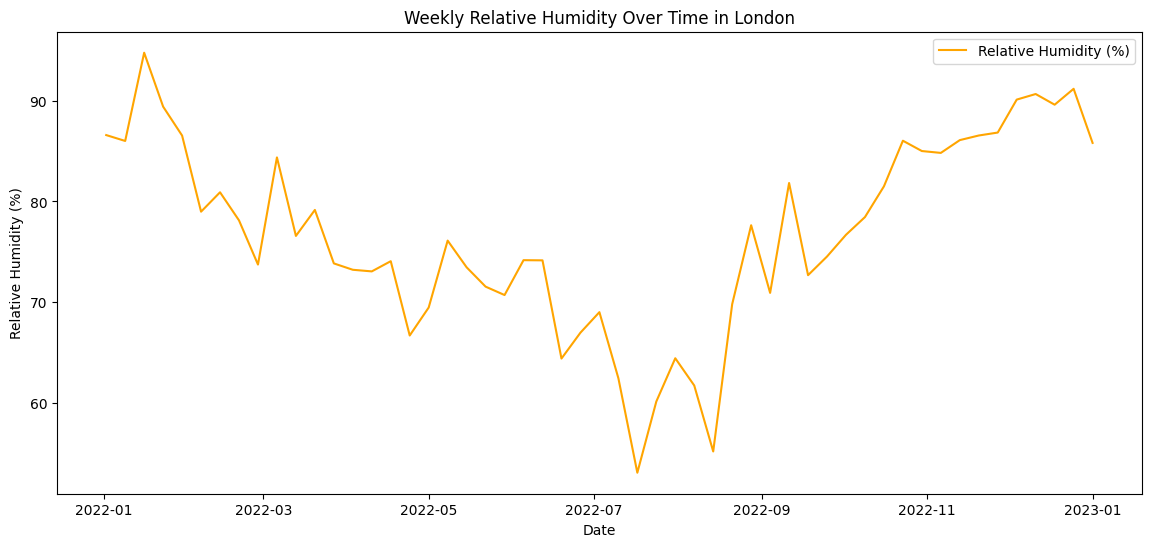

In [738]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(weekly_avg_london.index, weekly_avg_london['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Weekly Relative Humidity Over Time in London')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


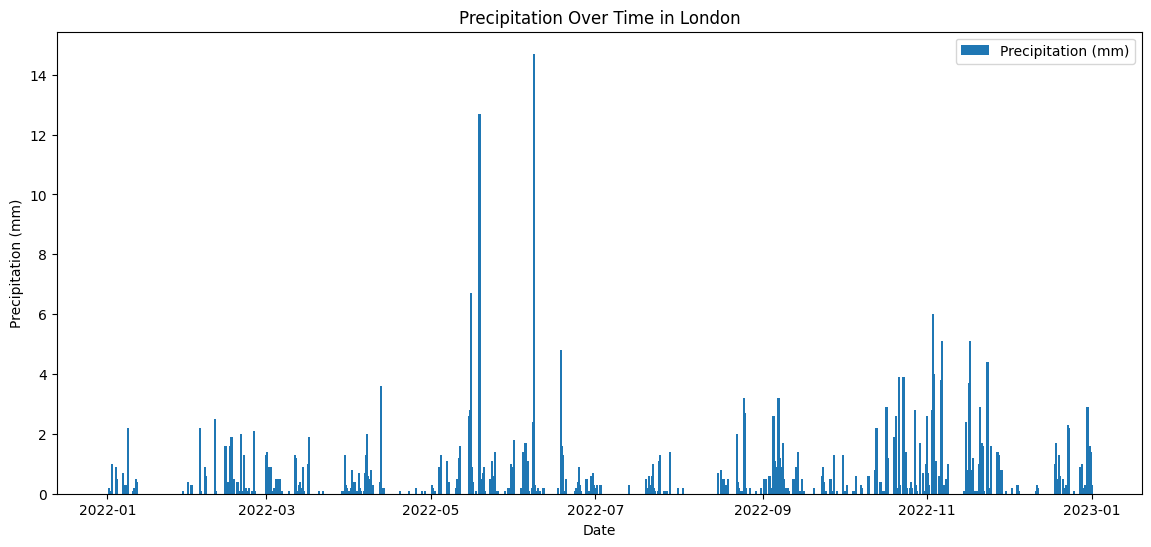

In [739]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df_london.index, df_london['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in London')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [740]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df_london['temperature_2m'].corr(df_london['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: -0.66


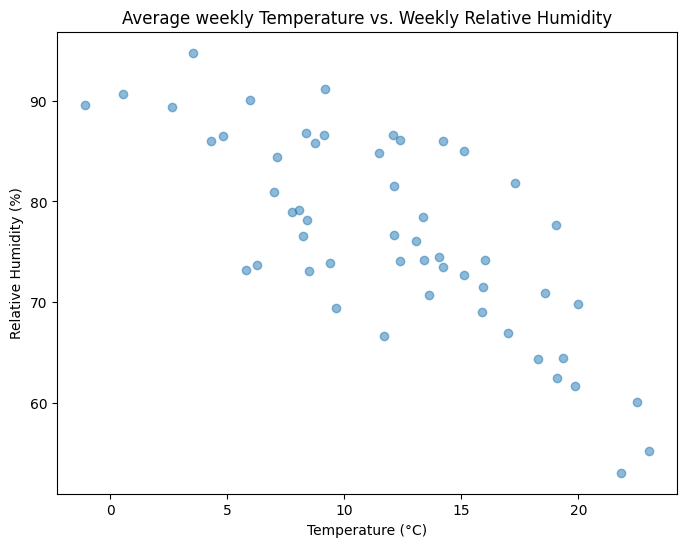

In [741]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(weekly_avg_london['temperature_2m'], weekly_avg_london['relativehumidity_2m'], alpha=0.5)
plt.title('Average weekly Temperature vs. Weekly Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


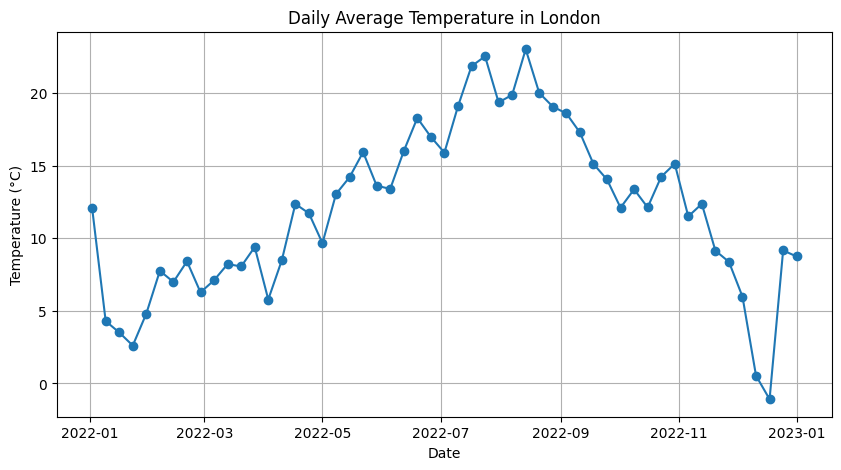

In [742]:
# Plot Weekly Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(weekly_avg_london.index, weekly_avg_london['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [743]:
# Step 8: Compare with Another Location (Seattle)

# Coordinates for Seattle
latitude_seattle = 47.6062
longitude_seattle = -122.3321

params_seattle = {
    'latitude': latitude_seattle,
    'longitude': longitude_seattle,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_seattle = requests.get(base_url, params=params_seattle)

In [744]:
# Check if the request was successful

if response_seattle.status_code == 200:
    print('Data fetched successfully!')
elif response_seattle.status_code == 429:
    retry_after = int(response.headers.get('Retry-After', 10)) # Default to 10 seconds
    print(f"Rate limit hit. Retry API call after {retry_after} seconds...")
    time.sleep(retry_after)
else:
    print(f'Failed to fetch data. Status code: {response_seattle.status_code}')

Data fetched successfully!


In [745]:
# Load and clean Seattle data
data_seattle = response_seattle.json()
hourly_data_seattle = data_seattle['hourly']
df_seattle = pd.DataFrame(hourly_data_seattle)

df_seattle['time'] = pd.to_datetime(df_seattle['time'])
df_seattle.set_index('time', inplace=True)
df_seattle.fillna(method='ffill', inplace=True)

/var/folders/66/hjdps8cj0sd_nt4v35d18wzc0000gn/T/ipykernel_22598/3974290931.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_seattle.fillna(method='ffill', inplace=True)


## Weekly Average Temperature comparison plot (London vs Seattle)

In [746]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'London': df_london.resample('W').mean()['temperature_2m'],
    'Seattle': df_seattle.resample('W').mean()['temperature_2m']
})


In [747]:
combined_temp.head()

,London,Seattle
time,,
2022-01-02,12.077083,-0.664583
2022-01-09,4.293452,3.792262
2022-01-16,3.513095,6.348810
2022-01-23,2.611310,5.747024
2022-01-30,4.813690,2.620833


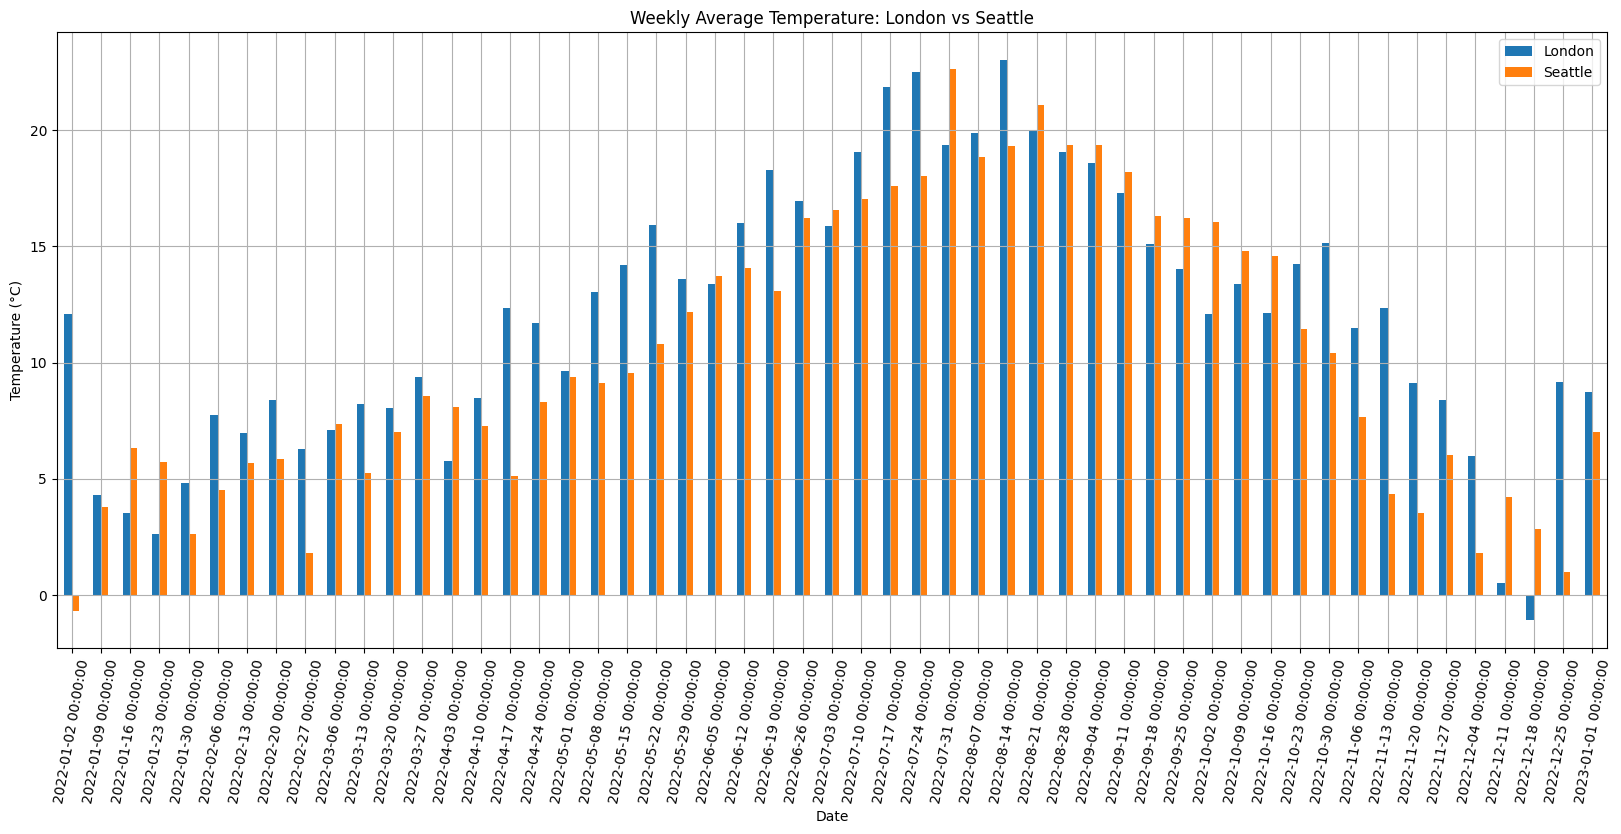

In [748]:
# Plot Comparison of Weekly Average Temperature

combined_temp.plot(kind='bar', figsize=(20, 8))
plt.title('Weekly Average Temperature: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()


## Weekly Total Precipitation comparison plot (London vs Seattle)

In [749]:
# Combine DataFrames for Comparison
weekly_tot_london = df_london.resample('W').sum()
weekly_tot_seattle = df_seattle.resample('W').sum()

combined_precipitation = pd.DataFrame({
    'London': weekly_tot_london['precipitation'],
    'Seattle': weekly_tot_seattle['precipitation']
})
combined_precipitation.head()

,London,Seattle
time,,
2022-01-02,2.2,31.3
2022-01-09,12.9,108.8
2022-01-16,3.1,45.5
2022-01-23,0.0,15.7
2022-01-30,0.1,6.1


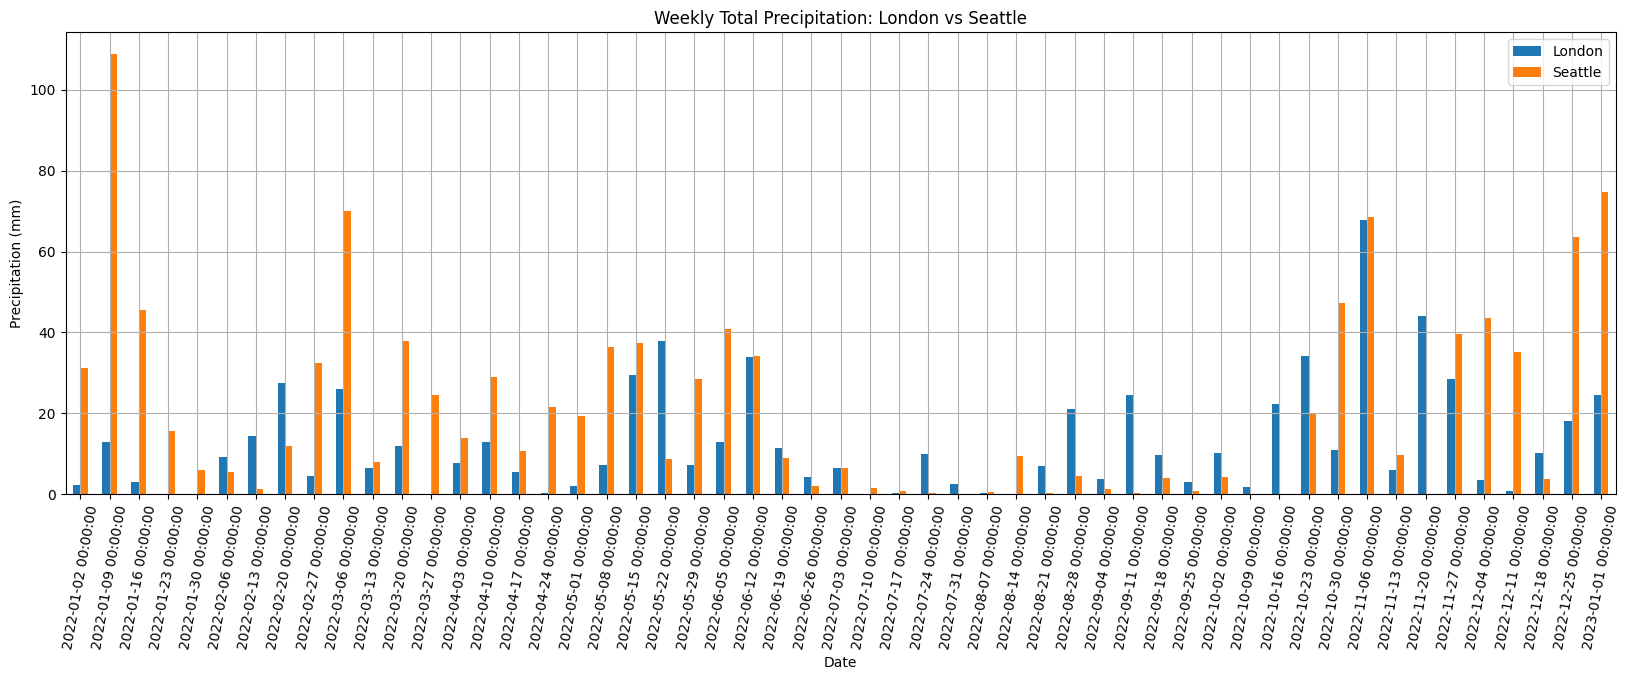

In [750]:
# Plot Precipitation Over Time
# Plot Comparison of Weekly Average Precipitation

combined_precipitation.plot(kind='bar', figsize=(20, 6))
plt.title('Weekly Total Precipitation: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()


In [751]:
# Step 9: Advanced Analysis - Precipitation Difference

# Calculate Precipitation Difference
combined_precipitation['Precipitation Difference'] = combined_precipitation['London'] - combined_precipitation['Seattle']
combined_precipitation.tail()

,London,Seattle,Precipitation Difference
time,,,
2022-12-04,3.5,43.7,-40.2
2022-12-11,0.7,35.2,-34.5
2022-12-18,10.1,3.7,6.4
2022-12-25,18.0,63.5,-45.5
2023-01-01,24.6,74.8,-50.2


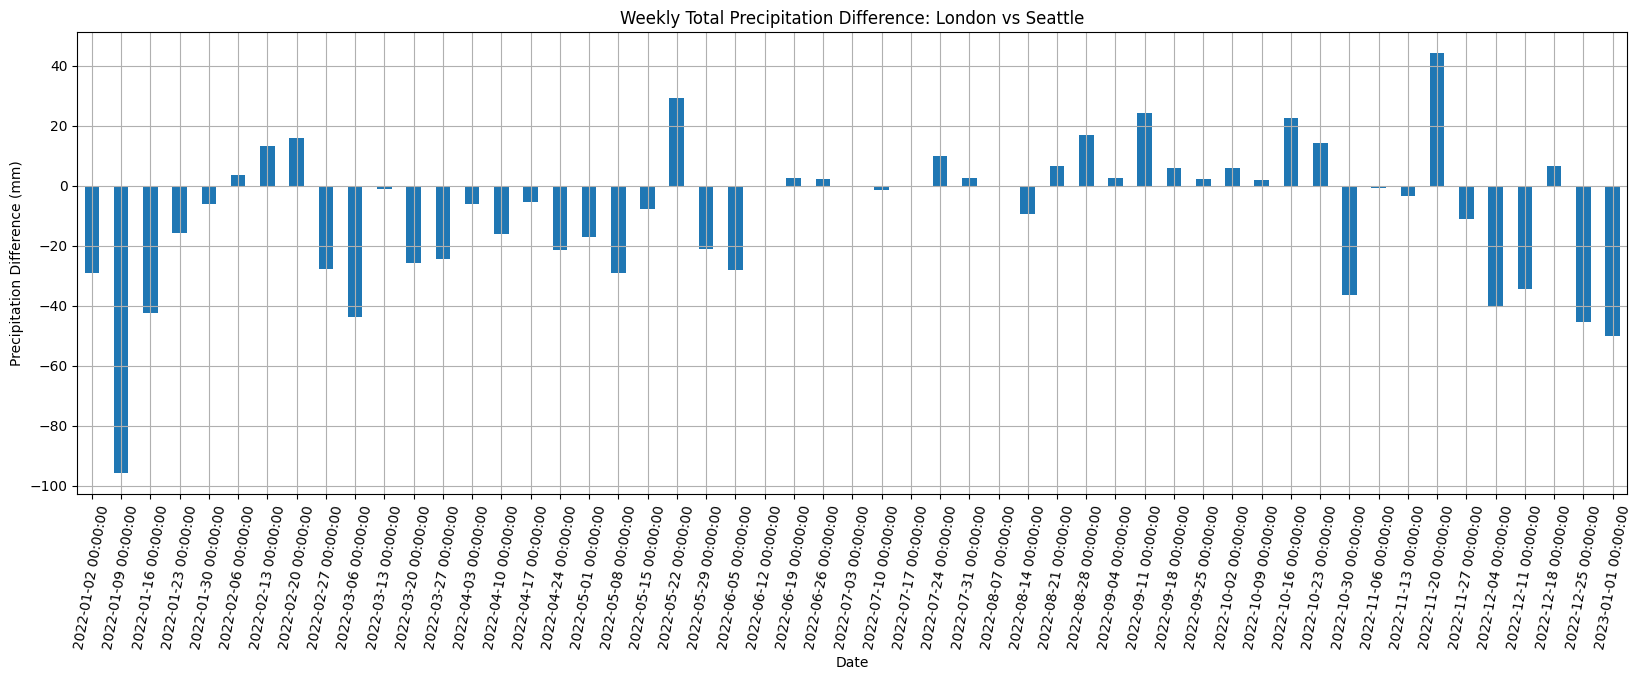

In [752]:
# Plot Precipitation Over Time
# Plot Comparison of Weekly Total Precipitation

combined_precipitation['Precipitation Difference'].plot(kind='bar', figsize=(20, 6))
plt.title('Weekly Total Precipitation Difference: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation Difference (mm)')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()


In [753]:
combined_precipitation.mean()

London                      12.505660
Seattle                     21.343396
Precipitation Difference    -8.837736
dtype: float64

## Analysis
#### Weekly Total Precipitation (London vs Seattle)

From the comparison plot above, Seattle has significantly more precipitation than London at the start of 2022 and at the end of 2022.
Both cities have relatively low precipitation in the summer compared to the other seasons.
On average, Seattle experiences about 8.8mm more precipitation weekly than London.

**Next Steps**:

- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.

In [303]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df_london.to_csv('london.csv')

# Save Los Angeles data
df_seattle.to_csv('seattle.csv')
